# Выявление определяющих успешность игры закономерностей 

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### План работы 
- Шаг 1. Изучение общей информации
- Шаг 2. Подготовка данных
  - Замена названий столбцов;
  - Преобразование данных в нужные типы;
  - Обработка пропусков при необходимости;
  - Исправление ошибок
- Шаг 3. Исследовательский анализ данных
  - Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
  - Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?
  - Возьмем данные за соответствующий актуальный период. 
  - Какие платформы лидируют по продажам, растут или падают? 
  - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
  - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков? 
  - Соотнесем выводы с продажами игр на других платформах.
  - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- Шаг 4. Портрет пользователя каждого региона

 Определим для пользователя каждого региона (NA, EU, JP):
  - Самые популярные платформы (топ-5). 
  - Самые популярные жанры (топ-5). 
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Шаг 5. Проверка гипотез
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Шаг 6. Общий вывод

## Шаг 1. Изучение общей информации 
Откроем файл, посмотрим, что же там есть 

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [4]:
games_data = pd.read_csv('datasets/games.csv')
print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
display(games_data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В датасете 16715 строк, есть пропущенные значения. Критичные пропущенные значения - в столбце с годом выпуска, их меньше 2%, предлагаю эти строки просто удалить. Остальные пропуски оставить 

Нужно изменить некоторые типы данных (год выпуска) и изменить названия столбцов для более удобной работы с ними

## Шаг 2. Подготовка данных

Приведем названия столбцов к более удобному для работы виду

In [6]:
games_data.columns = games_data.columns.str.lower()

In [7]:
print(games_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Получилось 

Теперь перейдем к пропускам. Удалим строки с пропусками в стобце с годом выпуска 

In [8]:
games_data.dropna(subset = ['year_of_release'], inplace = True)

И займемся типами данных

In [9]:
games_data['year_of_release'] = games_data['year_of_release'].astype('int')

Добавим столбец с сумарными продажами по миру 


In [10]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

Заменим значения отзывов tbd (неопределено) на NaN

In [11]:
def add_score(score):
    if score == 'tbd':
        score = 'NaN'
    return score

In [12]:
games_data['user_score'] = games_data['user_score'].apply(add_score)

In [13]:
games_data['user_score'] = games_data['user_score'].astype('float64')

Пропуски в стоблбцах name и genre оставляем, так как в актуальном периоде 2011-2016гг этих пропусков нет 

Данные подготовлены. Начнем анализ

## Шаг 3. Исследовалельский анализ данных

### Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

In [14]:
games_release_pivot = games_data.pivot_table(index = 'year_of_release', values = 'na_sales', aggfunc = 'count')
games_release_pivot.columns = ['quantity']

In [15]:
display(games_release_pivot)

,quantity
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Посмотрим на график для наглядности

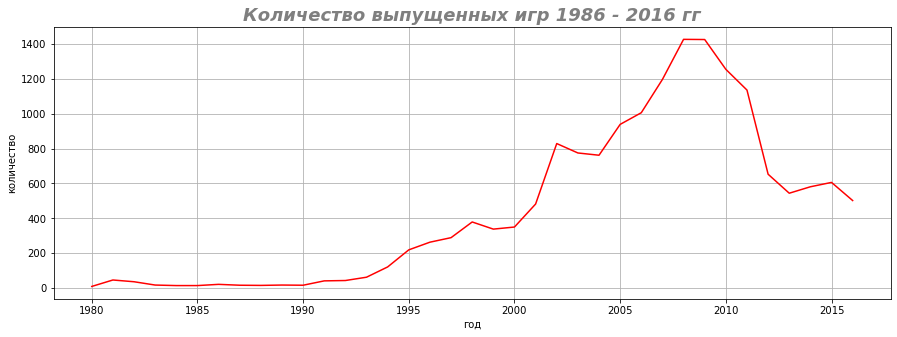

In [17]:

with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(15,5))
    plt.title('Количество выпущенных игр 1986 - 2016 гг', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
    plt.xlabel('год')
    plt.ylabel('количество')
    plt.grid()
    plt.plot(games_release_pivot, color = 'r')
    plt.show()

Больше 200 игр в год выпускали только начиная с 1995 года(из-за начала развития различных платформ для игр), но самый резкий подъем был в 2001 году. Рассмотрим только период с 2000-2015гг

### Как менялись продажи по платформам? За какой характерный срок появляются новые и исчезают старые платформы?

In [18]:
games_platform_pivot = games_data.pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')
games_platform_pivot = games_platform_pivot.reset_index()

In [19]:
display(games_platform_pivot)

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


31 платформа за 37 лет.
Посмотрим на общие продажи по платформам и выберем платфимы с самыми продаваемыми играми 

In [20]:
games_platform_pivot_total = games_data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
games_platform_pivot_total.columns = ['total_sales']
games_platform_pivot_total.sort_values('total_sales')

,total_sales
platform,
PCFX,0.03
GG,0.04
3DO,0.10
TG16,0.16
WS,1.42
NG,1.44
SCD,1.86
DC,15.95
GEN,30.77


Лидирует с большим отрывом PS2, за ней идет X360  и PS3. Посмотрим на распределение по годам 

In [21]:
ps2_pivot = games_platform_pivot.loc[games_platform_pivot['platform'] == 'PS2'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
ps2_pivot.columns = ['total_sales']

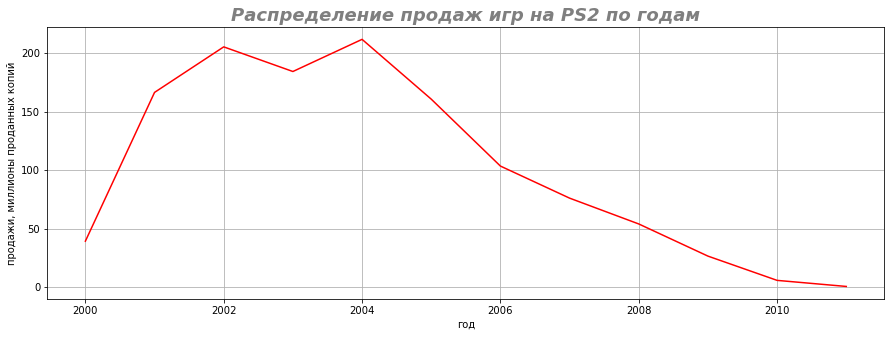

In [22]:
plt.figure(figsize=(15,5))
plt.title('Распределение продаж игр на PS2 по годам', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel('год')
plt.ylabel('продажи, миллионы проданных копий')
plt.grid()
plt.plot(ps2_pivot, color = 'r')
plt.show()


PS2 вышла в марте 200, продажи росли до 2004. Возможно, из-за выхода в 2005г Portable версии, или из-за появления x360

In [23]:
x360_pivot = games_platform_pivot.loc[games_platform_pivot['platform'] == 'X360'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
x360_pivot.columns = ['total_sales']

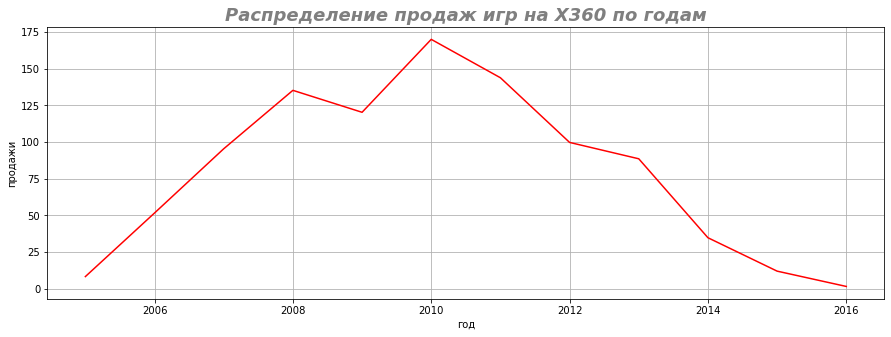

In [24]:
plt.figure(figsize=(15,5))
plt.title('Распределение продаж игр на X360 по годам', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel('год')
plt.ylabel('продажи')
plt.grid()
plt.plot(x360_pivot, color = 'r')
plt.show()


и сразу взглянем на пс3

In [25]:
ps3_pivot = games_platform_pivot.loc[games_platform_pivot['platform'] == 'PS3'].pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
ps3_pivot.columns = ['total_sales']

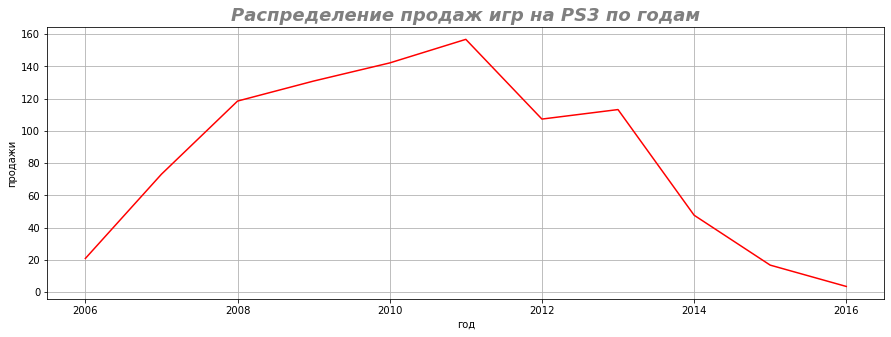

In [26]:
plt.figure(figsize=(15,5))
plt.title('Распределение продаж игр на PS3 по годам', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel('год')
plt.ylabel('продажи')
plt.grid()
plt.plot(ps3_pivot, color = 'r')
plt.show()


Платформы ps3 и x360 вышли в одно время, подъем и спад у них очень похож

Судя по распределениям продаж игр на топ платформач можно сделать вывод о том, что с выходом новых платформ (раз в 5 лет), игры на старые теряют актуальность.

Объединив вывод по продажам и вывод по выходам новых игр, можно определить актуальный период. Нам нужно построить прогноз на 2017 год, поэтому будем брать период с 2011 года. На новой консоли игры актуальные еще в течение 10 лет, новая консоль выходит каждые 5 лет, поэтому возьмем период 2011 - 2016 гг

In [27]:
games_data_actual = games_data.loc[games_data['year_of_release'] >= 2011]

In [28]:
print(games_data_actual.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int32  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     1812 non-null   float64
 9   user_score       2032 non-null   float64
 10  rating           2314 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 392.8+ KB
None


Как и говорилось выше, пропуски в name и genre ушли :)

### Какие платформы лидируют по продажам, растут или падают? 

In [29]:
games_actual_platform_pivot = games_data_actual.pivot_table(index = ('platform'), values = 'total_sales', aggfunc = 'sum')
games_actual_platform_pivot.columns = ['total_sales']
games_actual_platform_pivot = games_actual_platform_pivot.reset_index()



In [30]:
display(games_actual_platform_pivot)

,platform,total_sales
0,3DS,257.81
1,DS,38.73
2,PC,97.68
3,PS2,0.45
4,PS3,445.57
5,PS4,314.14
6,PSP,29.01
7,PSV,53.81
8,Wii,95.02
9,WiiU,82.19


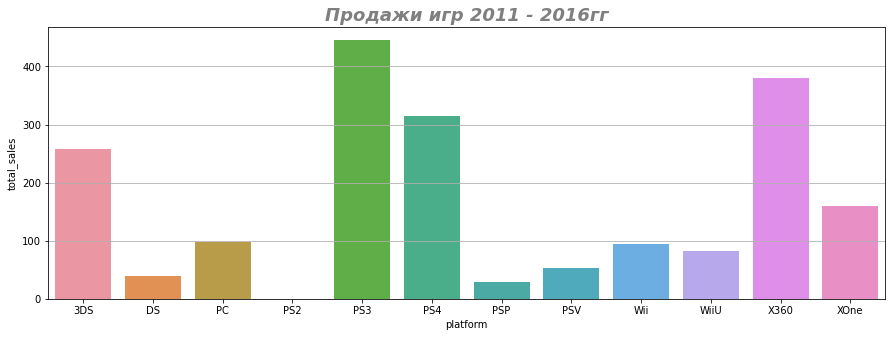

In [33]:
plt.figure(figsize=(15,5))
plt.title('Продажи игр 2011 - 2016гг', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.grid()
ax = sns.barplot(y = 'total_sales', x = 'platform',  data=games_actual_platform_pivot,)

Определенно лидеры по продажам PS3 и X360. Но мы уже выяснили, что продажи игр на эти консоли падают, а продажи игр на PS уже совсем еле заметны

Посмотрим на рост/падение продаж по остальным консолям 


<div class="alert alert-success"> 
<h2> Комментарии от ревьюера №1</h2>
    
У тебя очень симпатичные графики 👍
</div>

In [34]:
actual_sales_per_year = games_data_actual.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')


In [35]:
display(actual_sales_per_year)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,NaN,17.82,4.63,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,NaN,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,NaN,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,NaN,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,NaN,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:title={'center':'Продажи 2011 - 2016 гг'}, xlabel='year_of_release'>

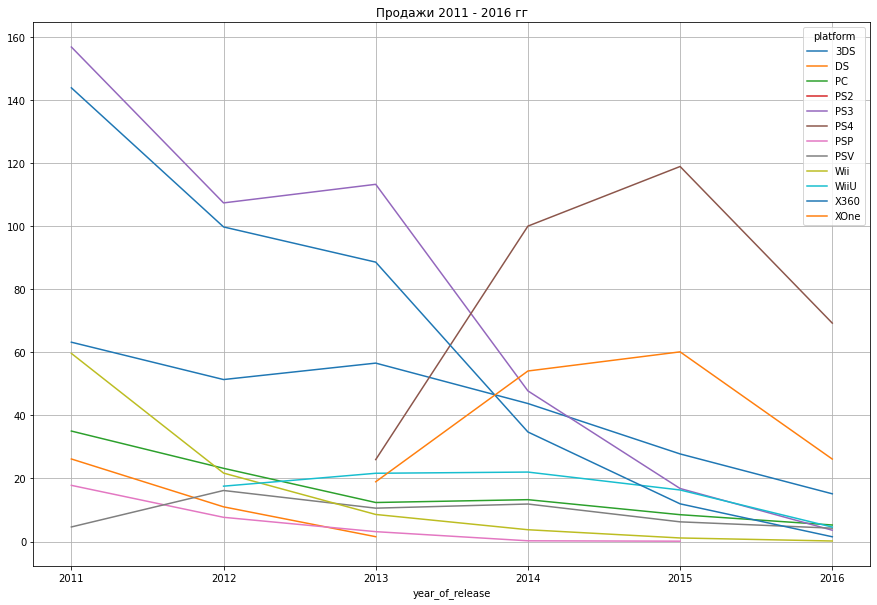

In [36]:
actual_sales_per_year.plot(
    figsize = (15, 10), title = 'Продажи 2011 - 2016 гг', grid = True)

Продажа игр по всем платформам падает.


Возможно, по каким-то новым платформам пик еще не пройден. Возьмем за потенциально прибыльные платформы новые - PS4, XOne, WiiU, а также вечного PC 

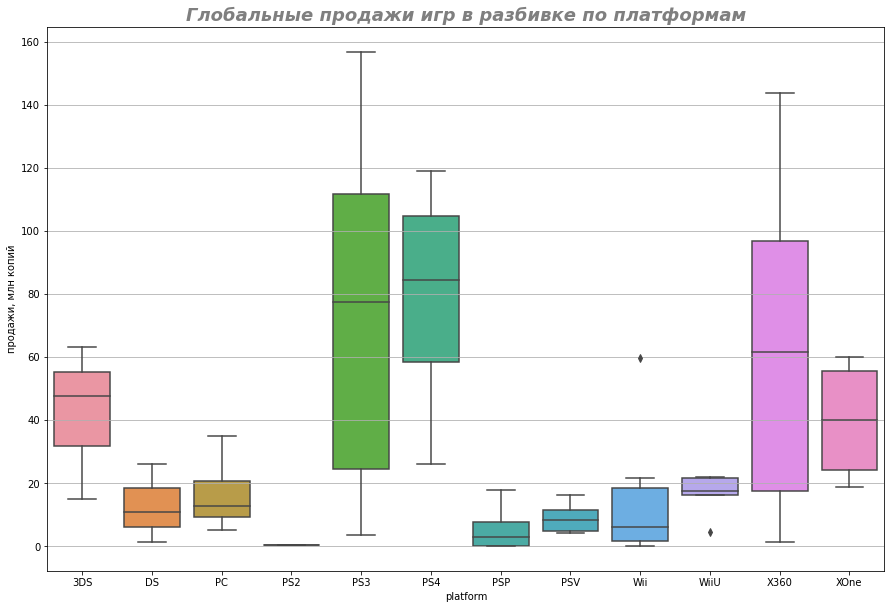

In [37]:
plt.figure(figsize=(15,10))
plt.title('Глобальные продажи игр в разбивке по платформам', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel('платформа')
plt.ylabel('продажи, млн копий')
plt.grid()
sns.boxplot(data=actual_sales_per_year)
plt.show()

PS4 лидер по медианным продажам. Следом идут PS3 и X360, которые уже теряют свою актуальность. Далее 3DS и XOne

Основываясь на исследовании платформ, можно сделать ставку на PS4, XOne, WiiU и 3DS

### Влияние отзывов критиков и покупателей на продажи

Разберем влияние отзывов на продажи на примере одной консоли. Посмотрим, на какой отзывов больше 

In [38]:
display(games_data_actual.pivot_table(index = 'platform', values = ['critic_score', 'user_score'], aggfunc = 'count'))

,critic_score,user_score
platform,,
3DS,166,171
DS,20,13
PC,289,307
PS2,0,3
PS3,349,417
PS4,252,257
PSP,14,16
PSV,119,142
Wii,48,60


Больше всего отзывов на ПС3, но платформа "увядает", поэтому рассмотрим ПС4

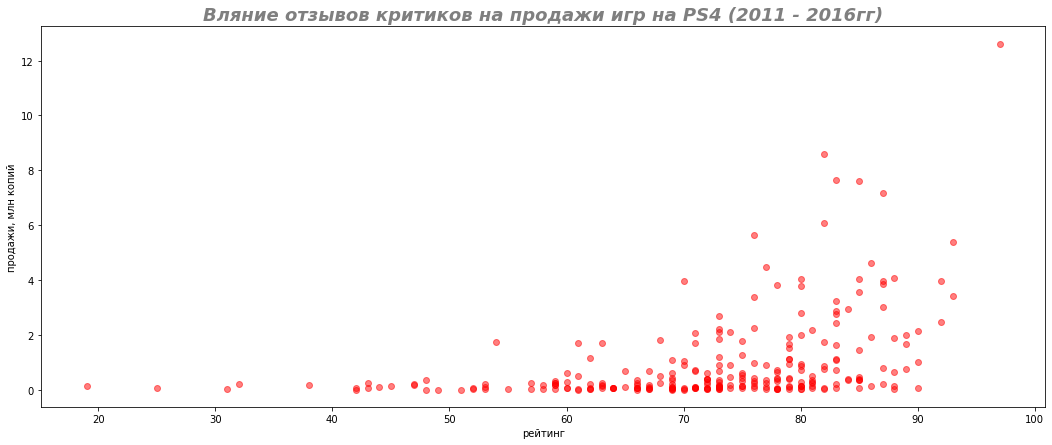

In [39]:
plt.figure(figsize=(18,7))
plt.title('Вляние отзывов критиков на продажи игр на PS4 (2011 - 2016гг)', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel('рейтинг')
plt.ylabel('продажи, млн копий')
plt.scatter(x='critic_score', y="total_sales", data=games_data_actual.loc[games_data_actual['platform'] == 'PS4'], color = 'r', alpha = 0.5)
plt.show()

In [40]:
print(games_data_actual.loc[games_data_actual['platform'] == 'PS4']['critic_score'].corr(games_data_actual.loc[games_data_actual['platform'] == 'PS4']['total_sales']))

0.4065679020617816


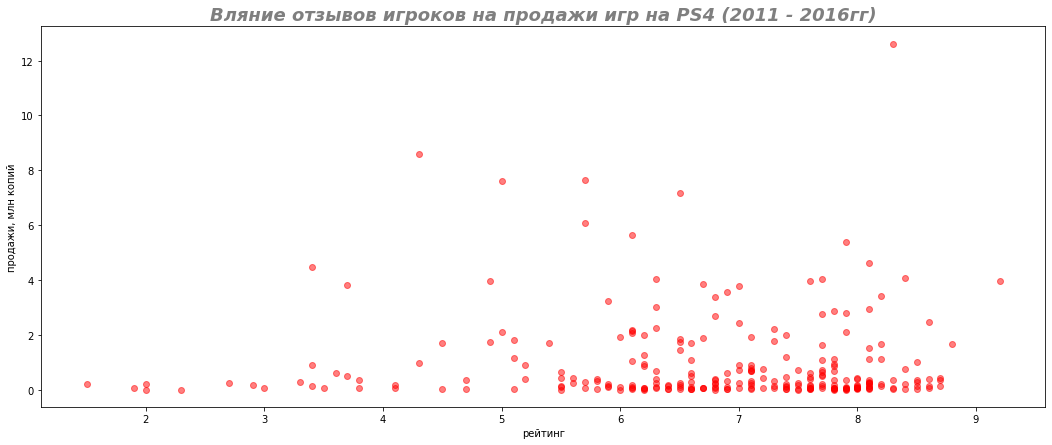

In [41]:

plt.figure(figsize=(18,7))
plt.title('Вляние отзывов игроков на продажи игр на PS4 (2011 - 2016гг)', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel('рейтинг')
plt.ylabel('продажи, млн копий')
plt.scatter(x='user_score', y="total_sales", data=games_data_actual.loc[games_data_actual['platform'] == 'PS4'], color = 'r', alpha = 0.5)
plt.show()

In [42]:
print(games_data_actual.loc[games_data_actual['platform'] == 'PS4']['user_score'].corr(games_data_actual.loc[games_data_actual['platform'] == 'PS4']['total_sales']))

-0.03195711020455643


Если отзывы критиков хоть как-то влияют на продажи игр, то отзывы игроков обратно влияют на продажи игр (хоть и слабо) - то есть, чем ниже рейтинг, тем лучше продажи 

Посмотрим, как обстоят дела с продажами на другие платформы 

3DS   0.34873973059848346
DS   0.2611658597550141
PC   0.3141847396903632
PS2   nan
PS3   0.38011114718290767
PS4   0.4065679020617816
PSP   0.3581381002722692
PSV   0.13176292727608935
Wii   0.2922694954272934
WiiU   0.34837976012017485
X360   0.3912533245484555
XOne   0.4169983280084017


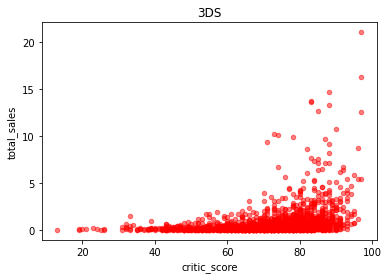

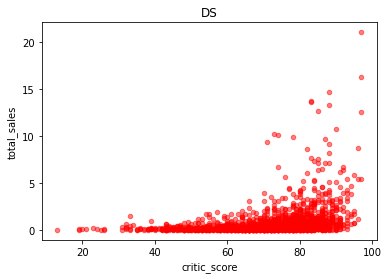

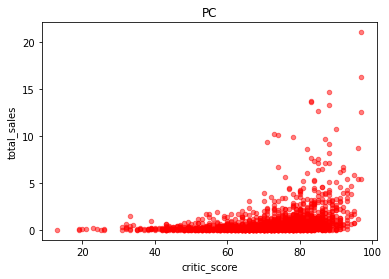

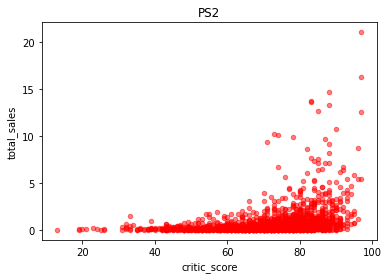

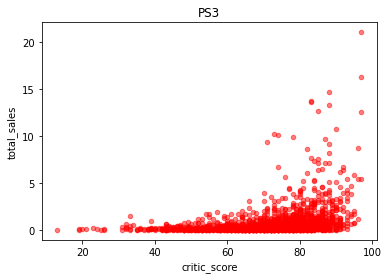

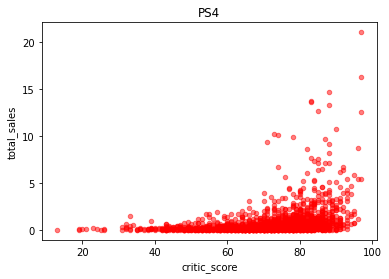

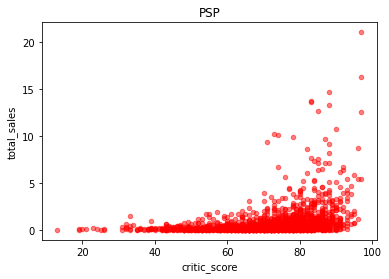

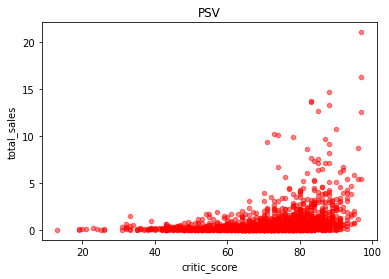

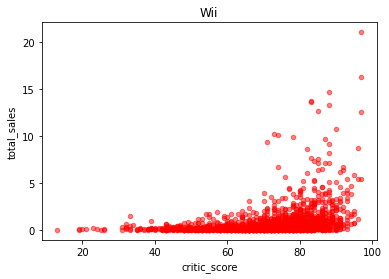

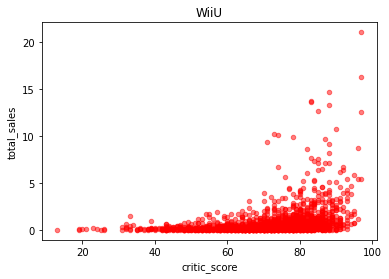

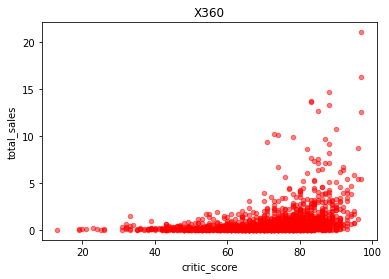

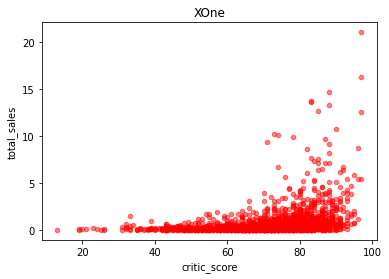

In [43]:
for platform, group_data in games_data_actual.groupby('platform'):
    games_data_actual.plot(x = 'critic_score', y = 'total_sales', kind = 'scatter', title = platform, color = 'r', alpha = 0.5)
    print(platform, ' ', games_data_actual.loc[games_data_actual['platform'] == platform]['critic_score'].corr(games_data_actual.loc[games_data_actual['platform'] == platform]['total_sales']))

3DS   0.22207843643390876
DS   0.2810294019560495
PC   -0.048966832335119545
PS2   -0.4881435810449095
PS3   0.014089348308019415
PS4   -0.03195711020455643
PSP   0.010035480754033762
PSV   0.013488756835886496
Wii   0.14550376734945006
WiiU   0.4002190202148617
X360   0.03891817072910261
XOne   -0.06892505328279416


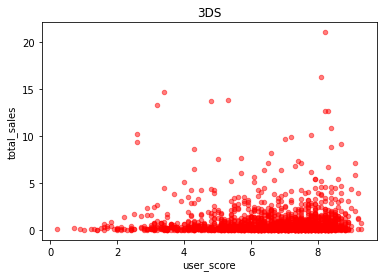

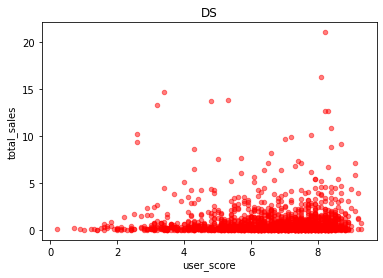

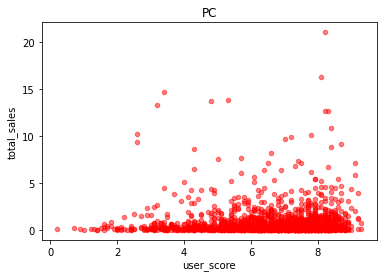

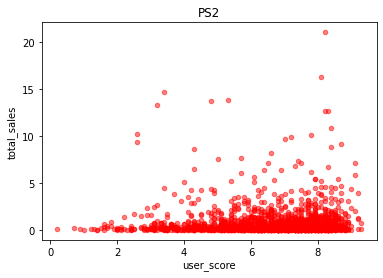

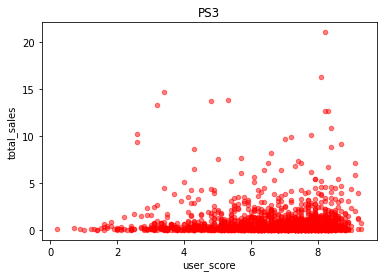

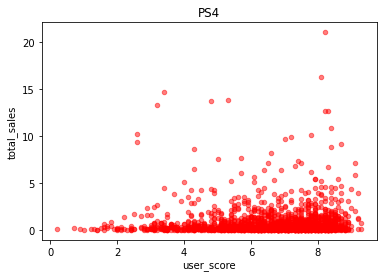

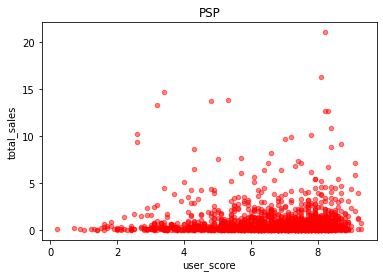

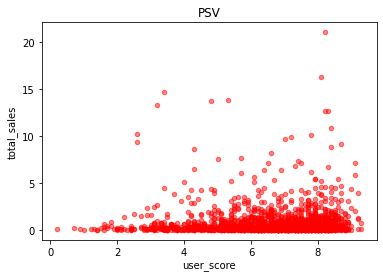

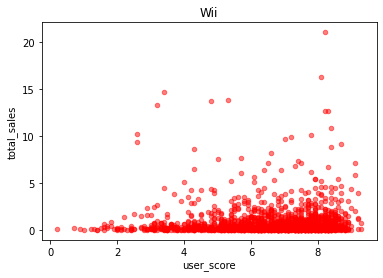

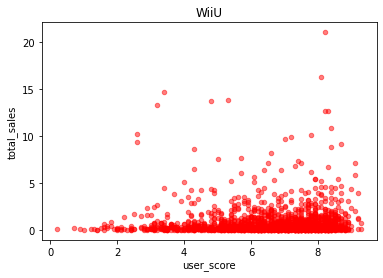

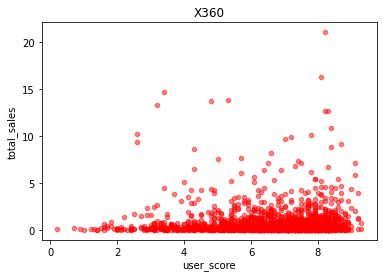

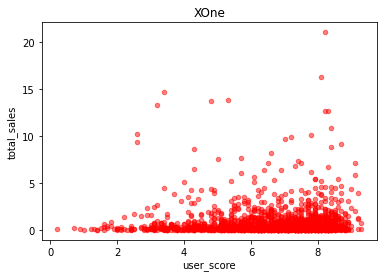

In [44]:
for platform, group_data in games_data_actual.groupby('platform'):
    games_data_actual.plot(x = 'user_score', y = 'total_sales', kind = 'scatter', title = platform, color = 'r', alpha = 0.5)
    print(platform, ' ', games_data_actual.loc[games_data_actual['platform'] == platform]['user_score'].corr(games_data_actual.loc[games_data_actual['platform'] == platform]['total_sales']))

На остальных платформах ситуация похожая - есть зависимость продаж от рейтинга критиков, в то время как продажи мало зависят, а то и обратно зависят от оценок игроков. Конечно, есть исключения - игры на 3DS и на WiiU лучше продаются с высокими оценками пользователей 

### Распределение по жанрам 

Посмотрим на медианные продажи игр по жанрам 

In [45]:
genre_pivot = games_data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
genre_pivot.columns = ['med_sales']
genre_pivot = genre_pivot.reset_index()

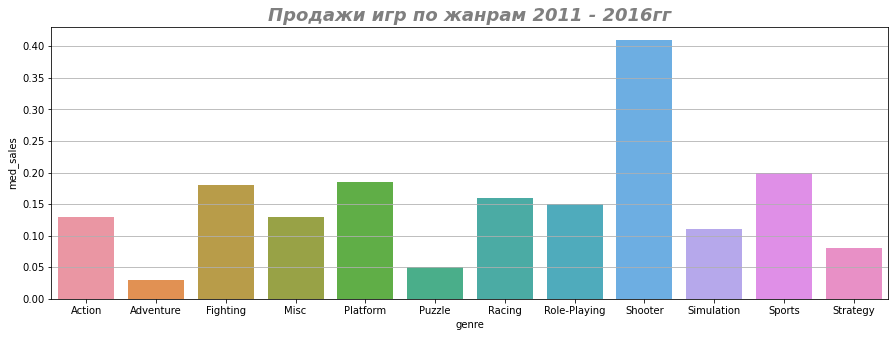

In [46]:
plt.figure(figsize=(15,5))
plt.title('Продажи игр по жанрам 2011 - 2016гг', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.grid()
ax = sns.barplot(y = 'med_sales', x = 'genre',  data=genre_pivot)

Шутер - самый прибильный жанр, приключенческий и паззл отстающие, а остальные жанры можно сказать, идут ровно друг с другом 

## Шаг 4. Портрет пользователя каждого региона

### Самые популярные платформы (топ-5) пля пользователей каждого региона 

Топ 5 платформ Северной Америки 

In [47]:
na_sales = games_data_actual.pivot_table(index = 'platform', values = ['na_sales', 'total_sales'], aggfunc = 'sum')
na_sales.columns = ['na_sales', 'vs_total_sales']

In [48]:
na_sales['vs_total_sales'] = na_sales['na_sales'] / na_sales['vs_total_sales']

In [49]:
na_sales = na_sales.sort_values('na_sales').tail()

In [50]:
display(na_sales)

,na_sales,vs_total_sales
platform,,
3DS,82.65,0.320585
XOne,93.12,0.584484
PS4,108.74,0.346151
PS3,168.26,0.377629
X360,226.80,0.596246


На северную Америку приходится более половины продаж игр на XOne и X360

Топ 5 платформ Европы 

In [51]:
eu_sales = games_data_actual.pivot_table(index = 'platform', values = ['eu_sales', 'total_sales'], aggfunc = 'sum')
eu_sales.columns = ['eu_sales', 'vs_total_sales']
eu_sales['vs_total_sales'] = eu_sales['eu_sales'] / eu_sales['vs_total_sales']
eu_sales = eu_sales.sort_values('eu_sales').tail()

In [52]:
display(eu_sales)

,eu_sales,vs_total_sales
platform,,
PC,56.70,0.580467
3DS,61.27,0.237656
X360,117.10,0.307850
PS4,141.09,0.449131
PS3,163.10,0.366048


А в Европе в топе игры на ПК, больше половины продаж по миру 

Топ 5 платформ Японии

In [53]:
jp_sales = games_data_actual.pivot_table(index = 'platform', values = ['jp_sales', 'total_sales'], aggfunc = 'sum')
jp_sales.columns = ['jp_sales', 'vs_total_sales']
jp_sales['vs_total_sales'] = jp_sales['jp_sales'] / jp_sales['vs_total_sales']
jp_sales = jp_sales.sort_values('jp_sales').tail()

In [54]:
display(jp_sales)

,jp_sales,vs_total_sales
platform,,
PS4,15.96,0.050805
PSV,21.84,0.405873
PSP,24.04,0.828680
PS3,49.39,0.110847
3DS,100.62,0.390287


Японцы верны отечественной PS. На PSP приходится более 80% мировых продаж

PS4 и 3DS в топе во всех регионах

### Самые популярные жанры по регионам 

Северная Америка

In [55]:
na_genre = games_data_actual.pivot_table(index = 'genre', values = ['na_sales', 'total_sales'], aggfunc = 'sum')
na_genre.columns = ['na_sales', 'vs_total_sales']
na_genre['vs_total_sales'] = na_genre['na_sales'] / na_genre['vs_total_sales']
na_genre = na_genre.sort_values('na_sales').tail()

In [56]:
display(na_genre)

,na_sales,vs_total_sales
genre,,
Misc,69.69,0.499857
Role-Playing,83.78,0.341082
Sports,108.70,0.458360
Shooter,194.43,0.482564
Action,230.92,0.413984


Европа

In [57]:
eu_genre = games_data_actual.pivot_table(index = 'genre', values = ['eu_sales', 'total_sales'], aggfunc = 'sum')
eu_genre.columns = ['eu_sales', 'vs_total_sales']
eu_genre['vs_total_sales'] = eu_genre['eu_sales'] / eu_genre['vs_total_sales']
eu_genre = eu_genre.sort_values('eu_sales').tail()

In [58]:
display(eu_genre)

,eu_sales,vs_total_sales
genre,,
Racing,40.58,0.459518
Role-Playing,62.30,0.253634
Sports,88.48,0.373097
Shooter,148.02,0.367377
Action,199.12,0.356974


Япония 

In [59]:
jp_genre = games_data_actual.pivot_table(index = 'genre', values = ['jp_sales', 'total_sales'], aggfunc = 'sum')
jp_genre.columns = ['jp_sales', 'vs_total_sales']
jp_genre['vs_total_sales'] = jp_genre['jp_sales'] / jp_genre['vs_total_sales']
jp_genre = jp_genre.sort_values('jp_sales').tail()

In [60]:
display(jp_genre)

,jp_sales,vs_total_sales
genre,,
Platform,12.13,0.136784
Fighting,12.38,0.185052
Misc,17.60,0.126237
Action,63.62,0.114055
Role-Playing,79.87,0.325164


Топ Европы и Америки схожи, когда в Японии распределение иное. Скорее всего дело в культуре. Япония как другой мир, соответственно, и увлечения у них другие. К тому же известно, что в Японии более популярны игры на телефонах, стоимость игр на консоли высока, поэтому они предпочитают покупать бу игры

### Влияние рейтинга  ESRB на продажи в отдельном регионе

In [61]:
games_data_actual['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T', 'EC', 'RP'], dtype=object)

- M - для взрослых
- E - для всех 
- E10+ - старше 10 
- T - для подростков 
- EC - для детей младшего возраста 
- RP - рейтинг ожидается 

nan учитывать не будем 


In [62]:
games_rating = games_data_actual.loc[games_data_actual['rating'] != 'nan'].pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'median')
games_rating.columns = ['na_sales', 'eu_sales', 'jp_sales']


In [63]:
display(games_rating)

,na_sales,eu_sales,jp_sales
rating,,,
E,0.05,0.0,0.08
E10+,0.09,0.0,0.12
EC,0.00,0.0,0.42
M,0.14,0.0,0.16
RP,0.03,0.0,0.00
T,0.04,0.0,0.07


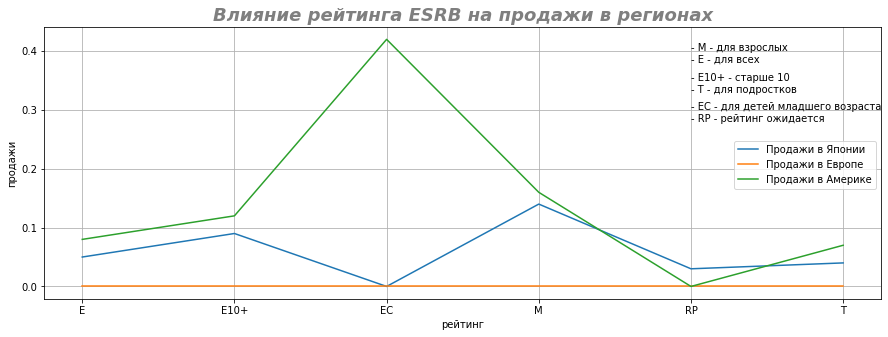

In [64]:
plt.figure(figsize=(15,5))
plt.title('Влияние рейтинга ESRB на продажи в регионах', alpha=0.5, color="k", fontsize=18, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel('рейтинг')
plt.ylabel('продажи')
plt.grid()
plt.text(4, 0.4, "- M - для взрослых")
plt.text(4, 0.38, "- E - для всех")
plt.text(4, 0.35, "- E10+ - старше 10")
plt.text(4, 0.33, "- T - для подростков")
plt.text(4, 0.3, "- EC - для детей младшего возраста")
plt.text(4, 0.28, "- RP - рейтинг ожидается")
plt.plot(games_rating)
plt.legend(['Продажи в Японии', 'Продажи в Европе', 'Продажи в Америке'], bbox_to_anchor = (1, 0.6))
plt.show()

Так как рейтинг американский, то правильно смотреть только на продажи в Америке

Лучше всего продаются игры для детей младшего возраста

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза: Средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингу ПК

- Альтернативная гипотеза: Средний пользовательский рейтинг платформы XOne не равен среднему пользовательскому рейтингу ПК

In [66]:
variance_xone = np.var(games_data_actual.loc[games_data_actual['platform'] == 'XOne']['user_score'])
print(variance_xone)

1.8965188383045533


In [67]:
variance_pc = np.var(games_data_actual.loc[games_data_actual['platform'] == 'PC']['user_score'])
print(variance_pc)

2.587838809960847


Дисперсии отличаются, установим equal_var = False

In [68]:
xone_score = games_data_actual.loc[(games_data_actual['platform'] == 'XOne') & (games_data_actual['user_score'] >= 0)]['user_score']
pc_score = games_data_actual.loc[(games_data_actual['platform'] == 'PC') & (games_data_actual['user_score'] >= 0)]['user_score']
alpha = .05
results = st.ttest_ind(xone_score, pc_score, equal_var = False)
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print('Средний пользовательский рейтинг XBox One', xone_score.mean())
print('Средний пользовательский рейтинг PC', pc_score.mean())


p-значение:  0.6130712247638477
Не получилось отвергнуть нулевую гипотезу
Средний пользовательский рейтинг XBox One 6.52142857142857
Средний пользовательский рейтинг PC 6.451791530944625


Получается, средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Скорее всего из-за того, что игры выходят сразу на нескольких платформах

### Средние пользовательские рейтинги жанров Action и Sports разные

- Нулевая гипотеза: средний пользовательский рейтинг жанров экшн равен среднему пользовательскому рейтингу спортивных жанров
- Альтернативная гипотеза: средний пользовательский рейтинг жанров экшн не равен среднему пользовательскому рейтингу спортивных жанров

In [70]:
action_variance = np.var(games_data_actual.loc[games_data_actual['genre'] == 'Action']['user_score'])
print(action_variance)

1.8091482798664522


In [71]:
sports_variance = np.var(games_data_actual.loc[games_data_actual['genre'] == 'Sports']['user_score'])
print(sports_variance)

2.8707920219446086


Дисперсии отличаются, установим equal_var = False

In [72]:
action_score = games_data_actual.loc[(games_data_actual['genre'] == 'Action') & (games_data_actual['user_score'] >= 0)]['user_score']
sports_score = games_data_actual.loc[(games_data_actual['genre'] == 'Sports') & (games_data_actual['user_score'] >= 0)]['user_score']
alpha = .05
results = st.ttest_ind(action_score, sports_score, equal_var = False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print('Средний пользовательский рейтинг жанра Action', action_score.mean())
print('Средний пользовательский рейтинг жанра Sports', sports_score.mean())


p-значение:  8.285648549432565e-19
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг жанра Action 6.775903614457846
Средний пользовательский рейтинг жанра Sports 5.650813008130081


Отвергаем нулевую гипотезу, значит, средние пользовательские рейтинги жанров Action и Sports разные. 

## Шаг 6. Общий вывод 

Проведя исследования за актуальный период 2011-2016гг, мы выяснили:
- Игры на разные платформы акуальны еще в течение 10 лет после выхода консоли. Первые 5 лет продажи растут, потом падают со скоростью роста
- Последние консоли вышли в 2013 году, можно сделать упор на них
- Продажи игр зависят от рейтингов критиков, оценки игроков чаще не влияют на покупаемость игры
- Самый популярный жанр - шутер 
- В США большей популярностью пользуется xBox, в Японии Xbox почти отсутствует, в Европе еще актуальны игры на ПК. Поэтому для планирования бюджета нужно учитывать рынок продаж
- Игры для детей - самые продаваемые
- Пользователи равно оценивают игры на различных платформах, а жанр влияет на оценку 
